# 1.What's Cooking? - Exploratory Data Analysis
This notebook provides a step-by-step analysis and solution to the given problem. It can also serve as a great starting point for learning how to explore, manipulate, transform and learn from textual data. It is divided into three main sections:

+Exploratory Analysis - as a first step, we explore the main characteristics of the data with the help of Plotly vizualizations;

+Text Processing - here we apply some basic text processing techniques in order to clean and prepare the data for model development;

+Feature Engineering & Data Modeling - in this section we extract features from data and build a predictive model of the cuisine. 

In [1]:
# Data processing
import pandas as pd
import numpy as np
import json
from collections import Counter
import re
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train_df = pd.read_json('train.json') # store as dataframe objects
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39774 entries, 0 to 39773
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           39774 non-null  int64 
 1   cuisine      39774 non-null  object
 2   ingredients  39774 non-null  object
dtypes: int64(1), object(2)
memory usage: 932.3+ KB


In [4]:
print("The training data consists of {} recipes".format(len(train_df)))
train_df.head()

The training data consists of 39774 recipes


,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


We have imported the data as a DataFrame object and the above codes show us the initial look of training samples. We observe that each recipe is a separate row and has:

+ a unique identifier - the 'id' column;
+ the type of cuisine in which this recipe falls - this is our target variable;
+ a list object with ingredients (the recipe) - this will be the main source of explanatory variables in our classification problem.

Problem statement: Predict the type of cuisine based on given data (ingredients). This is a classification task which requires text processing and analysis.

In [ ]:
#Now let's explore a little bit more about the target variable
print("Number of cuisine categories: {}".format(len(train_df.cuisine.unique())))
train_df.cuisine.unique()

Number of cuisine categories: 20


array(['greek', 'southern_us', 'filipino', 'indian', 'jamaican',
       'spanish', 'italian', 'mexican', 'chinese', 'british', 'thai',
       'vietnamese', 'cajun_creole', 'brazilian', 'french', 'japanese',
       'irish', 'korean', 'moroccan', 'russian'], dtype=object)

There are 20 different categories (cuisines) which we are going to predict. 

This means that the problem at hand is a multi-class classification.

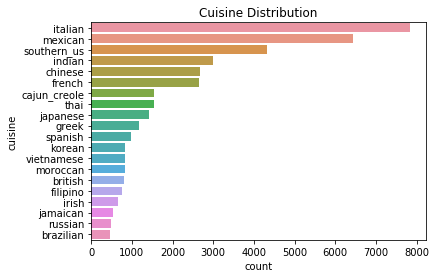

In [ ]:
sns.countplot(y=train_df.cuisine,order=train_df.cuisine.value_counts().reset_index()["index"])
plt.title("Cuisine Distribution")
plt.show()

In [ ]:
train_df.cuisine.value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [ ]:
print('Maximum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().max())
print('Minimum Number of Ingredients in a Dish: ',train_df['ingredients'].str.len().min())

Maximum Number of Ingredients in a Dish:  65
Minimum Number of Ingredients in a Dish:  1


Which are the most common ingredients in the whole training sample? How many unique ingredients can we find in the dataset? 

# 2. Text Processing
We will proceed the analysis by performing some simple data processing. The aim is to prepare the data for model development.

In [5]:
# Prepare the data 
features = [] # list of list containg the recipes
for item in train_df['ingredients']:
    features.append(item)

In [9]:
features[0:1]

[['romaine lettuce',
  'black olives',
  'grape tomatoes',
  'garlic',
  'pepper',
  'purple onion',
  'seasoning',
  'garbanzo beans',
  'feta cheese crumbles']]

In [10]:
ingrCounter = Counter()
features_processed= [] # here we will store the preprocessed training features
for item in features:
    newitem = []
    for ingr in item:
        # 需要注意
        ingr = ingr.lower() # Case Normalization - convert all to lower case 
        # ingr.lower() # Case Normalization - convert all to lower case 
        ingr = re.sub("[^a-zA-Z]", " ", ingr) # Remove punctuation, digits or special characters 
        # ingr = re.sub(r"(salt|water|onions|garlic|olive oil)", "", ingr)
        ingr = re.sub((r'\b(oz|ounc|ounce|pound|lb|inch|inches|kg|to)\b'), ' ', ingr) # Remove different units
        # 区分原料的组合
        ingr = re.sub(r" ", "_", ingr)
        # if delete the salt etc, this epxression must be included.
        if len(ingr) != 0:
            ingrCounter[ingr] += 1
            newitem.append(ingr)
    features_processed.append(newitem)

In [11]:
features_processed[0]

['romaine_lettuce',
 'black_olives',
 'grape_tomatoes',
 'garlic',
 'pepper',
 'purple_onion',
 'seasoning',
 'garbanzo_beans',
 'feta_cheese_crumbles']

In [12]:
ingrCounter.most_common(15)

[('salt', 18049),
 ('onions', 7972),
 ('olive_oil', 7972),
 ('water', 7457),
 ('garlic', 7380),
 ('sugar', 6434),
 ('garlic_cloves', 6237),
 ('butter', 4848),
 ('ground_black_pepper', 4785),
 ('all_purpose_flour', 4632),
 ('pepper', 4438),
 ('vegetable_oil', 4385),
 ('eggs', 3388),
 ('soy_sauce', 3296),
 ('kosher_salt', 3113)]

In [ ]:
train_df["features_processed"] = features_processed
ingr_df = pd.DataFrame(ingrCounter.most_common(15),columns=['ingredient','count'])
ingr_df

,ingredient,count
0,salt,18049
1,onions,7972
2,olive_oil,7972
3,water,7457
4,garlic,7380
5,sugar,6434
6,garlic_cloves,6237
7,butter,4848
8,ground_black_pepper,4785
9,all_purpose_flour,4632


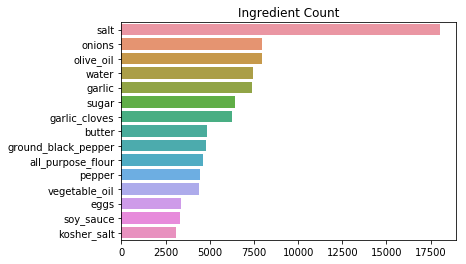

In [ ]:
#f, ax=plt.subplots(figsize=(12,20))
sns.barplot(y=ingr_df['ingredient'].values, x=ingr_df['count'].values,orient='h')
#plt.ylabel('Ingredient', fontsize=12)
#plt.xlabel('Count', fontsize=12)
#plt.xticks(rotation='horizontal')
#plt.yticks(fontsize=12)
plt.title("Ingredient Count")
plt.show()

It seems that salt is the most commonly used ingredient which is not surprising at all! We also find water, onions, garlic and olive oil - not so surprising also. :) 
+ Salt, water, onions, garlic are such common ingredients that we expect them to have poor predictive power in recognizing the type of cuisine.

# 3. Feature Engineering & Data Modeling

In [14]:
train_df['seperated_ingredients'] = train_df['ingredients'].apply(','.join)

In [18]:
train_df['seperated_ingredients'][0:2].values

array(['romaine lettuce,black olives,grape tomatoes,garlic,pepper,purple onion,seasoning,garbanzo beans,feta cheese crumbles',
       'plain flour,ground pepper,salt,tomatoes,ground black pepper,thyme,eggs,green tomatoes,yellow corn meal,milk,vegetable oil'],
      dtype=object)

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [41]:
corpus=["I come to China to travel", 
    "This is a car polupar in China",          
    "I love tea and Apple",   
    "The work is to write some papers in science"] 

In [42]:
vect = TfidfVectorizer().fit(corpus)

In [51]:
vect.get_feature_names_out()

array(['and', 'apple', 'car', 'china', 'come', 'in', 'is', 'love',
       'papers', 'polupar', 'science', 'some', 'tea', 'the', 'this', 'to',
       'travel', 'work', 'write'], dtype=object)

In [45]:
vect._tfidf

TfidfTransformer()

In [55]:
vect.idf_[0]*0.5

0.9581453659370776

In [44]:
vect.idf_

array([1.91629073, 1.91629073, 1.91629073, 1.51082562, 1.91629073,
       1.51082562, 1.51082562, 1.91629073, 1.91629073, 1.91629073,
       1.91629073, 1.91629073, 1.91629073, 1.91629073, 1.91629073,
       1.51082562, 1.91629073, 1.91629073, 1.91629073])

In [2]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['this is the first document',
          'this document is the second document',
          'and this is the third one',
          'is this the first document']
vocabulary = ['this', 'document', 'first', 'is', 'second', 'the',
              'and', 'one']
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                 ('tfid', TfidfTransformer())]).fit(corpus)
a = TfidfVectorizer(vocabulary=vocabulary).fit(corpus)


In [3]:
pipe['count'].transform(corpus).toarray()

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	1
  (0, 5)	1
  (1, 0)	1
  (1, 1)	2
  (1, 3)	1
  (1, 4)	1
  (1, 5)	1
  (2, 0)	1
  (2, 3)	1
  (2, 5)	1
  (2, 6)	1
  (2, 7)	1
  (3, 0)	1
  (3, 1)	1
  (3, 2)	1
  (3, 3)	1
  (3, 5)	1


array([[1, 1, 1, 1, 0, 1, 0, 0],
       [1, 2, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [4]:
pipe['count'].get_feature_names_out()

array(['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one'],
      dtype=object)

In [93]:
pipe['tfid'].idf_

array([1.        , 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.        , 1.91629073, 1.91629073])

In [94]:
a.idf_

array([1.        , 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.        , 1.91629073, 1.91629073])

In [6]:
pipe.transform(['this is is the first document',
          'and this is the third one',]).toarray()

  (0, 0)	1
  (0, 1)	1
  (0, 2)	1
  (0, 3)	2
  (0, 5)	1
  (1, 0)	1
  (1, 3)	1
  (1, 5)	1
  (1, 6)	1
  (1, 7)	1


array([[0.31978642, 0.39114469, 0.48314151, 0.63957283, 0.        ,
        0.31978642, 0.        , 0.        ],
       [0.31091996, 0.        , 0.        , 0.31091996, 0.        ,
        0.31091996, 0.59581303, 0.59581303]])

In [7]:
a.transform(['this is is the first document',
          'and this is the third one',]).toarray()

  (0, 0)	1.0
  (0, 1)	1.0
  (0, 2)	1.0
  (0, 3)	1.0
  (0, 5)	1.0
  (1, 0)	1.0
  (1, 3)	1.0
  (1, 5)	1.0
  (1, 6)	1.0
  (1, 7)	1.0


array([[0.38408524, 0.46979139, 0.58028582, 0.38408524, 0.        ,
        0.38408524, 0.        , 0.        ],
       [0.31091996, 0.        , 0.        , 0.31091996, 0.        ,
        0.31091996, 0.59581303, 0.59581303]])

In [27]:
vect.transform(['and','car','and car']).toarray()

array([[1.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ],
       [0.70710678, 0.        , 0.70710678, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer(binary=True).fit(train_df['seperated_ingredients'].values)
X_train_vectorized = vect.transform(train_df['seperated_ingredients'].values)
X_train_vectorized = X_train_vectorized.astype('float')

In [14]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
y_transformed = encoder.fit_transform(train_df.cuisine)

In [15]:
print(X_train_vectorized)
y_transformed

  (0, 2798)	0.15183517837377775
  (0, 2427)	0.23007896012035983
  (0, 2318)	0.3426671291173114
  (0, 2202)	0.23913220198081458
  (0, 2017)	0.10208411357610164
  (0, 1889)	0.1645493089953018
  (0, 1885)	0.26100924108701357
  (0, 1541)	0.2663871237012894
  (0, 1180)	0.35031170238526027
  (0, 1103)	0.10531073154596084
  (0, 1097)	0.38853112215987895
  (0, 967)	0.3040361765035925
  (0, 745)	0.3343204746101372
  (0, 528)	0.14568369866765699
  (0, 251)	0.1398962004921347
  (0, 185)	0.20748802168948122
  (1, 3012)	0.30913470576050534
  (1, 2905)	0.23719808692764152
  (1, 2798)	0.20426659039473835
  (1, 2775)	0.3034717400305941
  (1, 2373)	0.12082052495781231
  (1, 2100)	0.3831099504645736
  (1, 2017)	0.1373355900588895
  (1, 1877)	0.1300036033814326
  (1, 1724)	0.23580432530539203
  :	:
  (39772, 350)	0.1941573519292017
  (39772, 303)	0.27894483473192366
  (39772, 287)	0.13398798263813363
  (39772, 149)	0.13758614056520396
  (39773, 2971)	0.1975464041226418
  (39773, 2798)	0.17872306445833877

array([ 6, 16,  4, ...,  8,  3, 13], dtype=int64)

## Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, y_train, y_test = train_test_split(X_train_vectorized, y_transformed , random_state = 0)

lr1 = LogisticRegression(C=9,dual=False)
lr1.fit(X_train , y_train)
lr1.score(X_test, y_test)

0.7942477876106194